In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from nltk import wordpunct_tokenize, word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [2]:
# Reading in the data

Combined_Lyrics = pd.read_csv('Combined_Lyrics.csv')

In [3]:
# Creating a list of stop words, creating a lemmatizer

sw = stopwords.words('english')
new_words = ['1embedshare','2embedshare','3embedshare','4embedshare','5embedshare']
sw.extend(new_words)
wn = WordNetLemmatizer()
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [4]:
# Vectorizing lyrics data

cv = CountVectorizer(stop_words=sw, min_df=50)
X_cv = cv.fit_transform(Combined_Lyrics['Lyrics'])

In [5]:
# Converting the vectorized lyrics object to a dataframe
Vectorized_df = pd.DataFrame(X_cv.toarray(), columns = cv.get_feature_names_out())
# Appending on Artist and Genre
Vectorized_df = pd.concat([Vectorized_df, Combined_Lyrics[['Artist','Genre']]], axis = 1)
# Reordering the columns
cols_to_move = ['Artist', 'Genre']
Vectorized_df = Vectorized_df[ cols_to_move + [ col for col in Vectorized_df.columns if col not in cols_to_move ] ]

In [6]:
# Tfid Vectorzing lyrics data

tf = TfidfVectorizer(max_df = 0.95, min_df = 50)
X_tf = tf.fit_transform(Combined_Lyrics['Lyrics'])

In [7]:
# Converting tfid lyrics to object to a dataframe
Tfid_df = pd.DataFrame(X_tf.toarray(), columns=tf.get_feature_names_out())
Tfid_df = pd.concat([Tfid_df, Combined_Lyrics[['Artist','Genre']]], axis = 1)
# Reordering the columns
cols_to_move = ['Artist', 'Genre']
Tfid_df = Tfid_df[ cols_to_move + [ col for col in Tfid_df.columns if col not in cols_to_move ] ]

In [8]:
# Tfid_df

In [9]:
text = Tfid_df.drop(columns = 'Artist')
X = text.drop(columns = 'Genre')
y = text['Genre']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=71221, test_size=.4)

In [11]:
# scaler = preprocessing.StandardScaler().fit(X_train)
# X_scaled = scaler.transform(X_train)

In [12]:
# Import Packages
from sklearn.svm import SVC 
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, f1_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from matplotlib.pyplot import figure

from sklearn.neighbors import KNeighborsClassifier

### Model Evaluation 
###### (Lots of code taken from Dr. Giraud-Carrier)

In [13]:
model_names = []
accuracy_scores = []

# KNN

In [14]:
# Creating and fitting model, appending acuracy score to list

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
accuracy_scores.append(knn.score(X_test, y_test))
model_names.append("KNN")

# SVM

In [15]:
# Creating and fitting model, appending acuracy score to list

svclassifier = SVC()  # can try 'linear' for the kernel
svclassifier.fit(X_train, y_train)  
accuracy_scores.append(svclassifier.score(X_test, y_test))
model_names.append("SVC")

# NAIVE BAYES

In [16]:
# Creating and fitting model, appending acuracy score to list

naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
accuracy_scores.append(naive_bayes.score(X_test, y_test))
model_names.append("NaiveBayes")

# DECISION TREE

In [17]:
# Creating and fitting model, appending acuracy score to list

decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, y_train)
accuracy_scores.append(decision_tree.score(X_test, y_test))
model_names.append("DecTree")

# LOGISTIC REGRESSION

In [18]:
# # Creating and fitting model, appending acuracy score to list

# logistic_regression = LogisticRegression() 
# logistic_regression.fit(X_scaled, y_train)
# accuracy_scores.append(logistic_regression.score(X_test, y_test))
# model_names.append("LogReg")

# MLP

In [19]:
# Creating and fitting model, appending acuracy score to list

mlp = MLPClassifier(hidden_layer_sizes=(8,32,32), 
                    max_iter=10000, 
                    activation='tanh', 
                    verbose=False)
mlp.fit(X_train,y_train)
accuracy_scores.append(mlp.score(X_test, y_test))
model_names.append("MLP")

# ENSEMBLE METHODS

## RANDOM FOREST 

In [20]:
# Creating and fitting model, appending acuracy score to list

rf = RandomForestClassifier() 
rf.fit(X_train, y_train)
accuracy_scores.append(rf.score(X_test, y_test))
model_names.append("RandForest")

## VOTING

In [22]:
# Creating and fitting model, appending acuracy score to list

vc = VotingClassifier(estimators=[('dt', decision_tree), ('knn', knn), ('svc', svclassifier), ('naive_bayes', naive_bayes), ('mlp', mlp)], voting='hard')
# ('lr', logistic_regression), 
vc.fit(X_train, y_train)
accuracy_scores.append(vc.score(X_test, y_test))
model_names.append("Voting")

## BAGGING DECISION TREE

In [23]:
# Creating and fitting model, appending acuracy score to list

clf = BaggingClassifier(base_estimator = decision_tree, n_estimators=500)
clf.fit(X_train, y_train)
accuracy_scores.append(clf.score(X_test, y_test))
model_names.append("Bagging")

In [25]:
print(accuracy_scores)
print(model_names)

[0.42958039052762775, 0.6402160365600332, 0.52970502700457, 0.493560448691317, 0.5872455338595762, 0.6591192355629414, 0.6262982966348152, 0.6341919401744911]
['KNN', 'SVC', 'NaiveBayes', 'DecTree', 'MLP', 'RandForest', 'Voting', 'Bagging']


## ADA BOOST DECISION TREE

In [26]:
# Creating and fitting model, appending acuracy score to list

clf = AdaBoostClassifier(base_estimator = decision_tree, n_estimators=500)
clf.fit(X_train, y_train)
accuracy_scores.append(clf.score(X_test, y_test))
model_names.append("AdaBoost")

## STACKING

In [29]:
# Creating and fitting model, appending acuracy score to list

clf = StackingClassifier(estimators=[('dt', decision_tree), ('knn', knn), ('svc', svclassifier), ('naive_bayes', naive_bayes), ('mlp', mlp)], final_estimator = DecisionTreeClassifier(), n_jobs = -1, passthrough = False)
# ('lr', logistic_regression), 
clf.fit(X_train, y_train)
accuracy_scores.append(clf.score(X_test, y_test))
model_names.append("Stacking")

## GRAPHING RESULTS

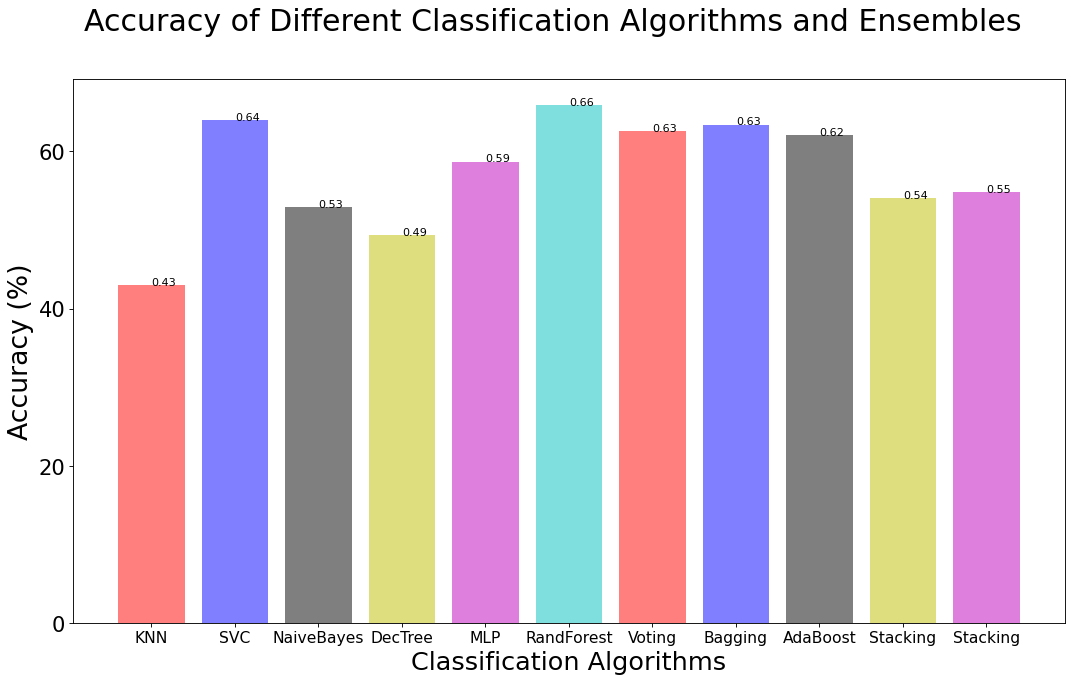

In [30]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np

fig = figure(num=None, figsize=(16, 9), dpi=80, facecolor='w', edgecolor='k')

y_pos = np.arange(len(model_names))
plt.xticks(range(len(model_names)), model_names, fontsize=14)
plt.yticks([0,0.2,0.40,0.60,0.80,1.00], (0,20,40,60,80,100), fontsize=19)
colors =['r','b','k','y','m','c']
    
plt.rcParams['xtick.labelsize'] = 20 
barlist = plt.bar(y_pos, accuracy_scores, color=colors, align='center', alpha=0.5)

plt.ylabel('Accuracy (%)', size = 24)
plt.xlabel("Classification Algorithms", size = 23)
plt.suptitle('Accuracy of Different Classification Algorithms and Ensembles', size = 27)
A = range(len(accuracy_scores))
for xy in zip(A, accuracy_scores):                                     
    plt.annotate('%0.2f' % xy[1], xy = xy, textcoords='data') 
         
plt.show()

In [31]:
print(rf.score(X_test, y_test))

0.6591192355629414


#### Random Forest seems to be the most accurate

### Attempt to bag and boost random forests to increase accuracy

##### Bagging

In [33]:
%%time
clf = BaggingClassifier(base_estimator = rf, n_estimators=100)
clf.fit(X_train, y_train)

Wall time: 13min 13s


0.6622351474864977

In [34]:
clf.score(X_test, y_test)

0.6622351474864977

##### Boosting

In [35]:
%%time
clf = AdaBoostClassifier(base_estimator = rf, n_estimators=100)
clf.fit(X_train, y_train)

Wall time: 1h 9min 55s


AdaBoostClassifier(base_estimator=RandomForestClassifier(), n_estimators=100)

In [36]:
clf.score(X_test, y_test)

0.6321146655587869

#### We can see that bagging and boosting had only a marginal effect on the accuracy of the model - for sake of brevity I excluded the code for this, but I aslo searched for optimal parameters for the random forest, but the default model performed the best. Because the Adaboost model performed slightly better accuracy-wise, I took that model as our final classifier. 

### Get predictions

In [33]:
# read in the new fires file
new_fires = pd.read_csv("UT2016-2018.csv")

# keep only the columns that would be available at the beginning of the fire
new_fires = new_fires[["FOD_ID", "FIRE_YEAR", "DISCOVERY_DOY", "DISCOVERY_TIME", 
               "LATITUDE", "LONGITUDE", "FIPS_NAME"]]

# if there is NaN for county, replace with "Unknown"
county = new_fires['FIPS_NAME'].copy()
county[new_fires['FIPS_NAME'].isnull()] = 'Unknown'
new_fires['FIPS_NAME'] = (county)
new_fires.FIPS_NAME.isna().values.any()

# get dummies for county
cat2 = pd.get_dummies(new_fires.FIPS_NAME)
new_fires = new_fires.join(cat2)
new_fires.drop('FIPS_NAME', axis=1, inplace=True)


new_fires.dropna(inplace=True)

In [34]:
# predicted values 

preds = clf.predict(new_fires)
probs = clf.predict_proba(new_fires)[:,1]

# final = pd.concat(preds, probs)
final = pd.DataFrame({'FOD_ID': new_fires.FOD_ID, 'Prediction': preds, 'PProb': probs}, columns=['FOD_ID', 'Prediction', 'PProb'])
# dataset = pd.DataFrame({'label': label, 'images': list(images)}, columns=['label', 'images'])

In [35]:
# # write to csv
# final.to_csv("thunder-fire-predictions.csv")